In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataframe
# df = pd.read_csv('your_data.csv')
df = pd.read_csv(r'G:\My Drive\School\Current Classes\SSIE 548 - Healtchare Data Science\Project\Data\sbcdata.csv')
df = df.drop(columns=['Id','Center', 'Set', 'Sender', 'Episode', 'Time','TargetIcu', 'SecToIcu','PCT', 'CRP','Sex'])

# Splitting the dataframe into groups based on the Diagnosis column
groups = df.groupby(by='Diagnosis')
sep = groups.get_group('Sepsis')  # Group 1
ctrl = groups.get_group('Control')  # Group 0

# Extracting feature columns (excluding 'Diagnosis')
features = [col for col in df.columns if col != 'Diagnosis']

# Plotting probability distributions for each feature
# for feature in features:
#     plt.figure(figsize=(4, 3))
#     sns.kdeplot(sep[feature], label='SEP', shade=True)
#     sns.kdeplot(ctrl[feature], label='CTRL', shade=True)
#     plt.title(f'Probability Distribution of {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Density')
#     plt.legend()
#     plt.show()


C:\Users\connc\AppData\Local\Temp\ipykernel_3040\1560125980.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sep[feature], label='SEP', shade=True)
C:\Users\connc\AppData\Local\Temp\ipykernel_3040\1560125980.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ctrl[feature], label='CTRL', shade=True)


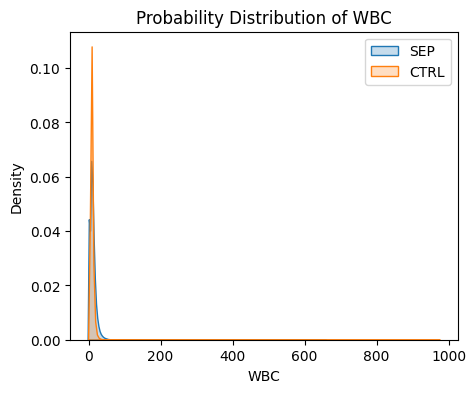

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataframe
# df = pd.read_csv('your_data.csv')
df = pd.read_csv(r'G:\My Drive\School\Current Classes\SSIE 548 - Healtchare Data Science\Project\Data\sbcdata.csv')
df = df.drop(columns=['Id','Center', 'Set', 'Sender', 'Episode', 'Time','TargetIcu', 'SecToIcu','PCT', 'CRP','Sex'])

# Splitting the dataframe into groups based on the Diagnosis column
groups = df.groupby(by='Diagnosis')
sep = groups.get_group('Sepsis')  # Group 1
ctrl = groups.get_group('Control')  # Group 0

# Extracting feature columns (excluding 'Diagnosis')
features = [col for col in df.columns if col != 'Diagnosis']
feature=features[5]

# Plotting probability distributions for each feature
plt.figure(figsize=(5, 4))
sns.kdeplot(sep[feature], label='SEP', shade=True)
sns.kdeplot(ctrl[feature], label='CTRL', shade=True)
plt.title(f'Probability Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Density')
plt.legend()
plt.show()


'WBC'